# Assesment on Personal Loan Modelling uning Supervised Learning  techniques - Manojkumar Sivaraman

##### Import Required details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [31]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.135743,11.413140,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [32]:
bank_data.isnull().any()

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [6]:
bank_data[bank_data['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

Dropping ID and Zip Code as these cannot be used for any of the analysis

In [7]:
exp_ind = bank_data[bank_data['Experience'] < 0].index.tolist()
age_ind = bank_data[bank_data['Experience'] < 0]['Age'].unique().tolist()

In [8]:
for i in exp_ind:
    for j in age_ind:
        bank_data.loc[i,'Experience'] = bank_data[(bank_data.Age == j) & (bank_data.Experience > 0)].Experience.mean()

In [9]:
bank_data.drop(['ID','ZIP Code'],axis=1,inplace=True)

## Analysis using visulation techniques

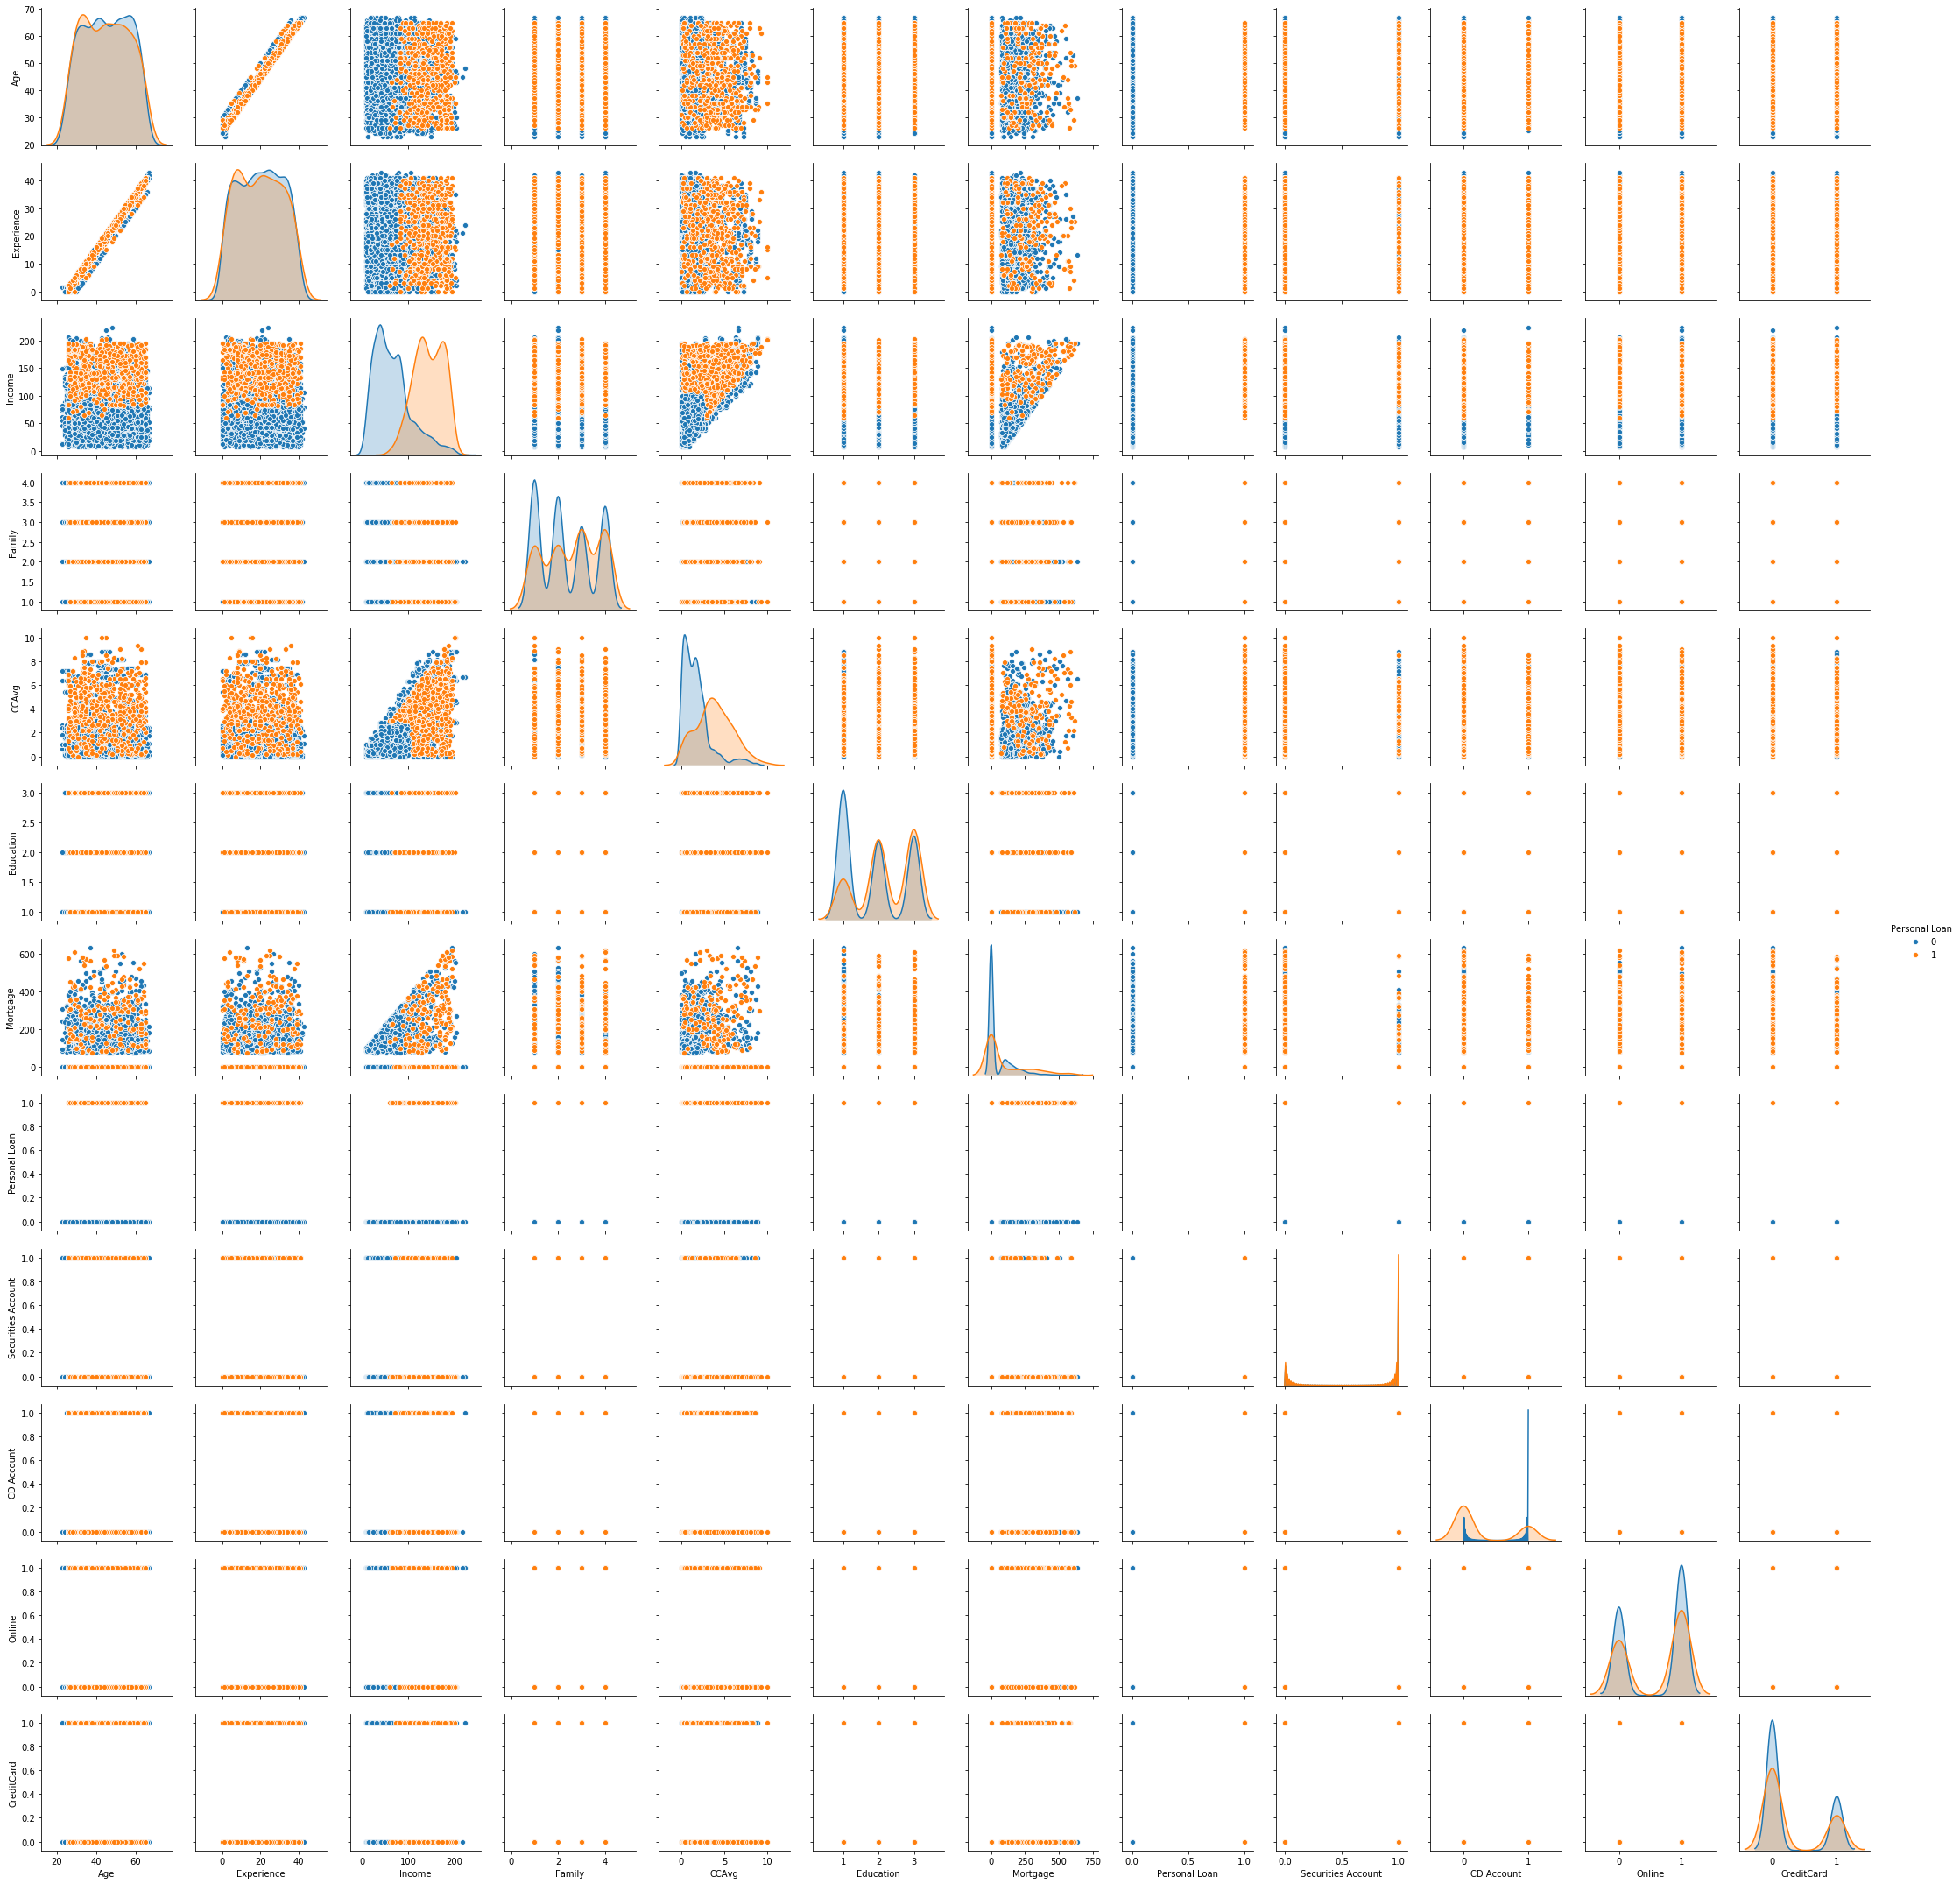

In [11]:
sns.pairplot(bank_data,hue='Personal Loan')

From the above plot
<ol>
    
    1) Age is normally distributed with most of the customers between the age of 30 to 60. Also Personal loan is also evenly distributed within all ages 
    2) Experience is normally distributed in which Personal loan is evenly distributed within various experience levels
    3) Age has high correlation with Experience
    4) People with High Income tend to have Personal loans where as people with low income does not have personal loans.
    5) Personal Loans is evenly distributed for the people having Credit card Average spending at the same time, people with less credit card average tend to have no personal loans
    6) Credit card Average spending is right skewed and people with high income have high CC average
    7) Mortgage is right skewed with almost 70% to 75% of the mortgage amount is within 500K and the mortgage value     increases as the Income increases. 

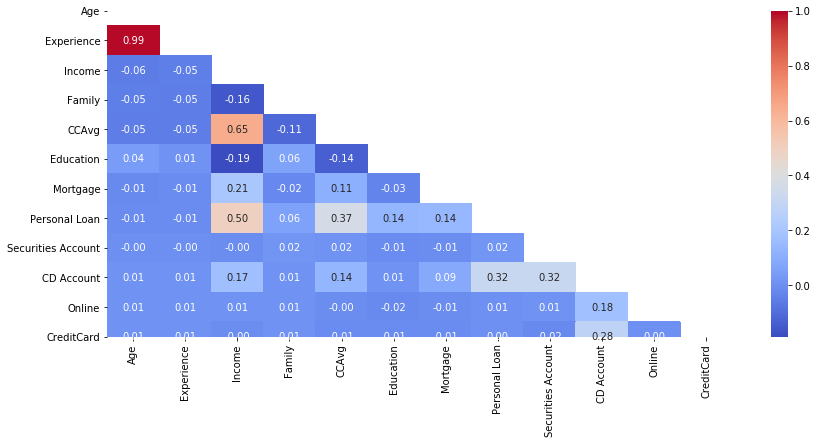

In [30]:
corr=bank_data.corr()
plt.figure(figsize=(14,6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
a = sns.heatmap(corr,mask=mask,annot=True,cmap='coolwarm',fmt='.2f')

<ol>
    
    1)	There is a high correlation between Age and Experience. Since Age and Experience has a very high correlation, one of this can be dropped from the modelling
    2)	There is a good correlation between Income with Credit card average spending and Income with Personal Loan 
    3)	There is also correlation between 
        a.	Personal loan with the Credit card average spending
        b.	Certificate of deposit (CD) with Personal Loan
        c.	Certificate of deposit (CD) with Securities Account 


In [34]:
n_true=len(bank_data.loc[bank_data['Personal Loan']==True])
n_false=len(bank_data.loc[bank_data['Personal Loan']==False])
n_true_p=(n_true/(n_true+n_false)*100)
n_false_p=(n_false/(n_true+n_false)*100)
print('No of people with PL   : ',n_true)
print('% of people with PL    : ',n_true_p)
print('No of people without PL: ',n_false)
print('No of people without PL: ',n_false_p)


No of people with PL   :  480
% of people with PL    :  9.6
No of people without PL:  4520
No of people without PL:  90.4


# Modelling

##### Splitting the data into training and testing data

In [65]:
from sklearn.model_selection import train_test_split
X=bank_data.drop(['Personal Loan','Experience'],axis=1)
y=bank_data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

### Logistic regression model

In [58]:
from sklearn.linear_model import LogisticRegression
PL_LR_model= LogisticRegression(solver='liblinear')
PL_LR_model.fit(X_train,y_train)
PL_LR_model_pred= PL_LR_model.predict(X_test)

In [59]:
PL_LR_model_score=PL_LR_model.score(X_test,y_test)
print(PL_LR_model_score)

0.9426666666666667


In [64]:
from sklearn import metrics
LR_cm=metrics.confusion_matrix(y_test,PL_LR_model_pred,labels=[1,0])
print(LR_cm)

[[  76   73]
 [  13 1338]]


###### Classification Report

In [67]:
LR_cr=metrics.classification_report(y_test,PL_LR_model_pred,labels=[1,0])
print('Logistic regression model Classification Report')
print(LR_cr)

Logistic regression model Classification Report
              precision    recall  f1-score   support

           1       0.85      0.51      0.64       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



### Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
PL_NB_model=GaussianNB()
PL_NB_model.fit(X_train,y_train)
PL_NB_model_pred= PL_NB_model.predict(X_test)
PL_NB_model_score=PL_NB_model.score(X_test,y_test)
print(PL_NB_model_score)

0.8746666666666667


In [76]:
NB_cm=metrics.confusion_matrix(y_test,PL_NB_model_pred,labels=[1,0])
print(NB_cm)

[[  85   64]
 [ 124 1227]]


In [77]:
NB_cr=metrics.classification_report(y_test,PL_NB_model_pred,labels=[1,0])
print('Naive Bayes model Classification Report')
print(NB_cr)

Naive Bayes model Classification Report
              precision    recall  f1-score   support

           1       0.41      0.57      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



## KNN model

In [101]:
from sklearn.neighbors import KNeighborsClassifier
PL_KNN_T=KNeighborsClassifier(n_neighbors=5,weights='distance')
PL_KNN_T.fit(X_train,y_train)
PL_KNN_T_pred= PL_KNN_T.predict(X_test)
PL_KNN_T_score=PL_KNN_T.score(X_test,y_test)
print(PL_KNN_T_score)

0.9073333333333333


In [105]:
KNN_cm_t=metrics.confusion_matrix(y_test,PL_KNN_T_pred,labels=[1,0])
print(KNN_cm_t)

[[  53   96]
 [  43 1308]]


#### Choosing correct K value

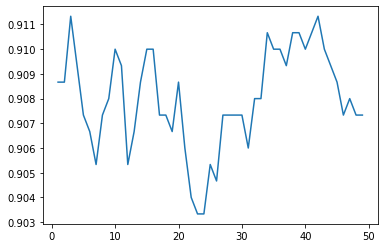

In [84]:
KNN_score = []
for i in range (1,50):
    PL_KNN = KNeighborsClassifier(n_neighbors=i,weights='distance')
    PL_KNN.fit(X_train,y_train)
    KNN_score.append(PL_KNN.score(X_test,y_test))
plt.plot(range(1,50),KNN_score)    

In [100]:
for i in range (1,49):
    if KNN_score[i] > 0.91:
        print(i,KNN_score[i])

2 0.9113333333333333
33 0.9106666666666666
37 0.9106666666666666
38 0.9106666666666666
40 0.9106666666666666
41 0.9113333333333333


###### Selecting K as 2

In [176]:
from sklearn.neighbors import KNeighborsClassifier
PL_KNN_model=KNeighborsClassifier(n_neighbors=2,weights='distance')
PL_KNN_model.fit(X_train,y_train)
PL_KNN_model_pred= PL_KNN_model.predict(X_test)

In [177]:
KNN_cm=metrics.confusion_matrix(y_test,PL_KNN_model_pred,labels=[1,0])
print(KNN_cm)

[[  68   81]
 [  56 1295]]


In [178]:
KNN_cr=metrics.classification_report(y_test,PL_KNN_model_pred,labels=[1,0])
print('KNN model Classification Report')
print(KNN_cr)

KNN model Classification Report
              precision    recall  f1-score   support

           1       0.55      0.46      0.50       149
           0       0.94      0.96      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.74      0.71      0.72      1500
weighted avg       0.90      0.91      0.90      1500



With the above data, 
<ol>
    
    1) Logistic regression has an accuracy of 94% with precision of 85% and recall of 51% in predicting the persons who might buy a personal Loan
    2) Naive Bayes has an accuracy of 87% with precision of 41% and recall of 57% in predicting the persons who might buy a personal Loan
    3) KNN has an accuracy of 91% with precision of 55% and recall of 46% in predicting the persons who might buy a personal Loan
    
## Conclusion    
    The precision and accuracy is high for Logistic regression at the same time it has a good recall percentage as well. Hence we can use Logistic regression for perdicting the likelihood of a liability customer buying personal loans